Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.Check eligibility of the Customer given the inputs described above.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
test = pd.read_csv("/content/machine learning project testing_set.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
test.shape

(367, 12)


*    ** First look at the Dataset*

*   **identify the missing values*



Categorical Columns: Gender (Male/Female), Married (Yes/No), Number of dependents (Possible values:0,1,2,3+), Education (Graduate / Not Graduate), Self-Employed (No/Yes), credit history(Yes/No), Property Area (Rural/Semi-Urban/Urban) and Loan Status (Y/N)(i. e. Target variable)

Numerical Columns: Loan ID, Applicant Income, Co-applicant Income, Loan Amount, and Loan amount term

In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
property_Area         0
dtype: int64

**missing data treatment** 


In [ ]:
for item in test.columns:
  if test[item].dtype =='object':
    a = test[item].mode()[0]
    test[item] = test[item].fillna(a)
  else:
    b =test[item].median()
    test[item]= test[item].fillna(b)


In [ ]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
dtype: int64

In [ ]:
# read the data set
data = pd.read_csv('/content/machine learning project training_set.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [ ]:
data.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

**missing data treatment** 


In [ ]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Credit_History'] 

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [ ]:
for item in data.columns:
  if data[item].dtype =='object':
    a = data[item].mode()[0]
    data[item] = data[item].fillna(a)
  else:
    b =data[item].median()
    data[item]= data[item].fillna(b)

In [ ]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

# Univariate Analysis:

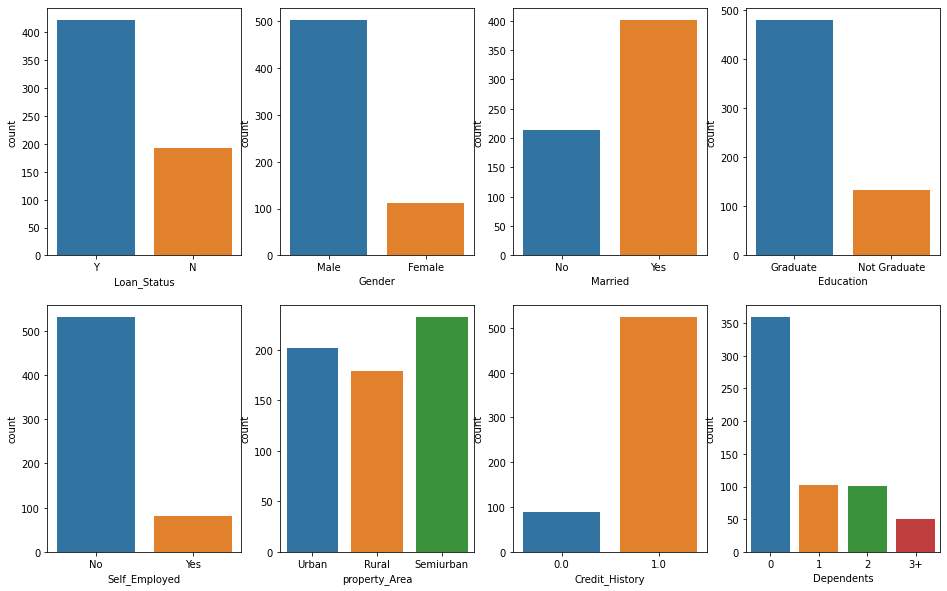

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")




fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=data,ax=ax[0][0])
sns.countplot('Gender',data=data,ax=ax[0][1])
sns.countplot('Married',data=data,ax=ax[0][2])
sns.countplot('Education',data=data,ax=ax[0][3])
sns.countplot('Self_Employed',data=data,ax=ax[1][0])
sns.countplot('property_Area',data=data,ax=ax[1][1])
sns.countplot('Credit_History',data=data,ax=ax[1][2])
sns.countplot('Dependents',data=data,ax=ax[1][3])



# Univariate Analysis Observations
1. More Loans are approved Vs Rejected

2. Count of Male applicants is more than Female

3. Count of Married applicant is more than Non-married

4. Count of graduate is more than non-Graduate

5. Count of self-employed is less than that of Non-Self-employed

6. Maximum properties are located in Semiurban areas

7. Credit History is present for many applicants

8. The count of applicants with several dependents=0 is maximum

# Bivariate Analysis

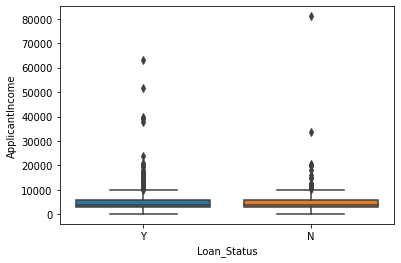

In [ ]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=data)

Mean ApplicantIncome of 0 and 1 are almost the same (o: no,1: Yes)

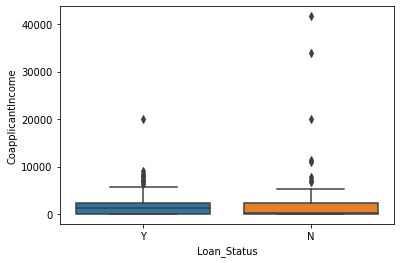

In [ ]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=data)

Mean Co- ApplicantIncome of 1 is slightly more than 0 (o: no,1 Yes)

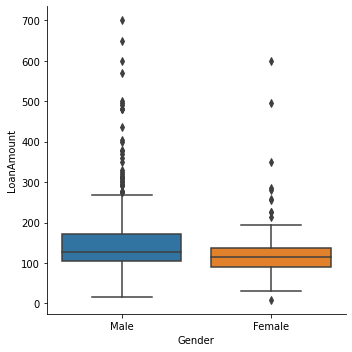

In [ ]:
sns.catplot(x='Gender',y='LoanAmount',data=data,kind='box')

The mean value of Loan Amount applied by males (0) is slightly higher than Females(1).

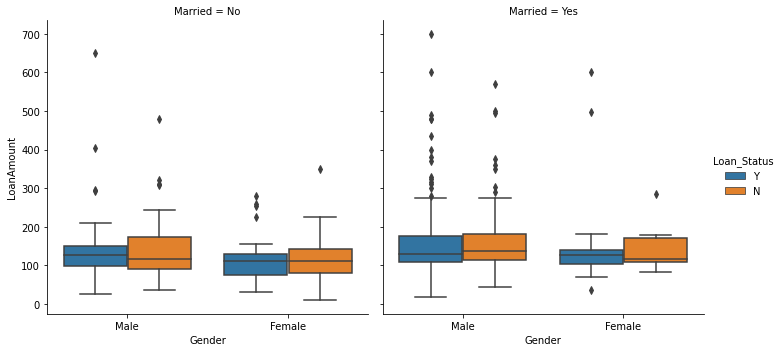

In [ ]:
sns.catplot(x='Gender',y='LoanAmount',data=data,kind='box',hue='Loan_Status',col='Married')

If you are married then the loan amount requested is slightly higher than non-married

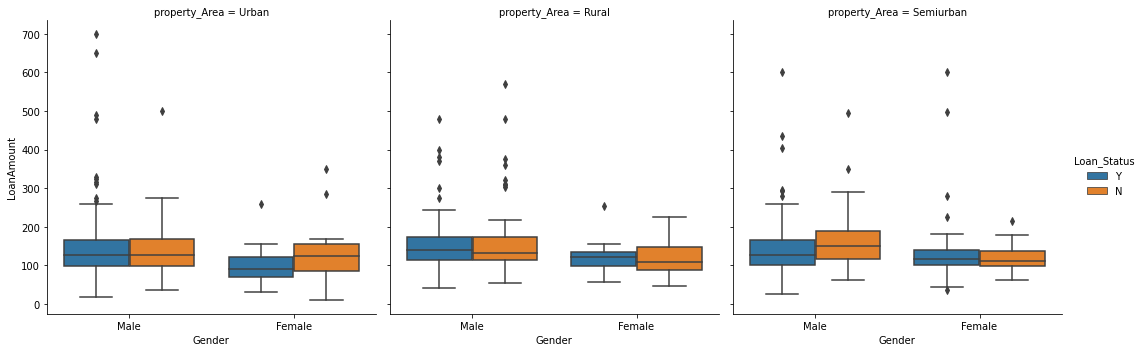

In [ ]:
sns.catplot(x='Gender',y='LoanAmount',data=data,kind='box',hue='Loan_Status',col='property_Area')

Male have higher Co-applicant income than females in all three property areas

# Correlation matrix

<function matplotlib.pyplot.show(*args, **kw)>

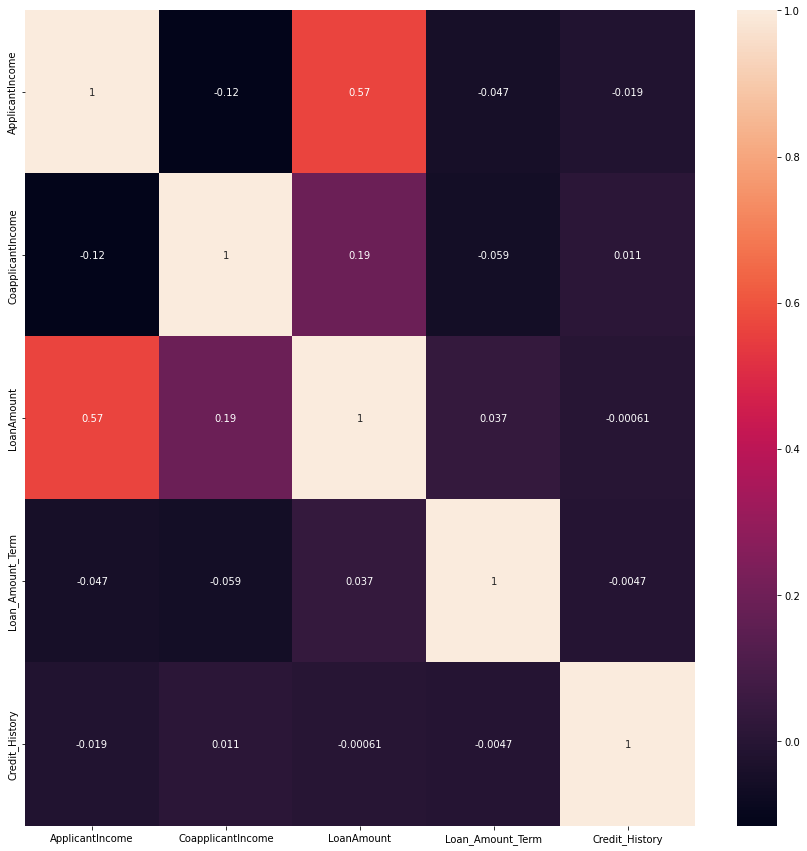

In [ ]:
plt.figure(figsize = (15,15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show


# Final train and test dataset with no missing data which we will further use for solving problem statement 

# Need to check eligibility of customer for loan (Classification)

In [ ]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
test["TotalIncome"] = test["ApplicantIncome"] + test["CoapplicantIncome"]

In [ ]:
data = data.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)
test = test.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)

In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,5314.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


# Define X and Y

In [ ]:
X = data.drop(["Loan_Status","Loan_ID"],axis=1)
y = data[["Loan_Status"]]
P = test.drop(["Loan_ID"],axis=1)

In [ ]:
X.shape

(614, 10)

In [ ]:
P.shape

(367, 10)

In [ ]:
y.shape

(614, 1)

#Preprocessing or One hot encoding


In [ ]:
X = pd.get_dummies(X)
P = pd.get_dummies(P)

In [ ]:
len(X.columns)


19

In [ ]:
len(P.columns)
# There is no differnce of columns in Pnew compared to Xnew

19

#Division of training data in training and testing set


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=0)


#Model 1:- KNN classifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
from sklearn.metrics import accuracy_score,plot_confusion_matrix

training accuracy is :  74.53999999999999 %
testing accuracy 59.35 %
Confusin Matrix for xtest data:-



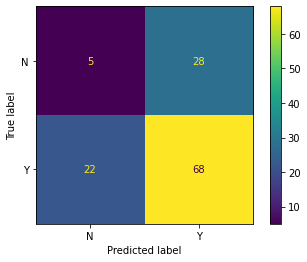

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain, ytrain)
b=model.predict(xtest)
a=model.predict(xtrain)
KNN_A=round(accuracy_score(ytest,b),4)
print("training accuracy is : ",round(accuracy_score(ytrain,a),4)*100,"%")
print("testing accuracy",KNN_A*100,"%")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(model,xtest,ytest))

#Model 2:- Decision Tree Classifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytrain['Loan_Status'] =le.fit_transform(ytrain['Loan_Status'])
ytest['Loan_Status'] =le.fit_transform(ytest['Loan_Status'])

training accuracy is :  100.0 %
testing accuracy 71.54 %
Confusin Matrix for xtest data:-



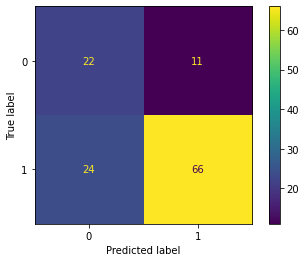

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=101)
c= model.fit(xtrain,ytrain)
b=c.predict(xtest)
a=c.predict(xtrain)
DT_A=round(accuracy_score(ytest,b),4)
print("training accuracy is : ",round(accuracy_score(ytrain,a),4)*100,"%")
print("testing accuracy",DT_A*100,"%")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(c,xtest,ytest))

#Model 3:- Random Forest Classifier

training accuracy is :  100.0 %
testing accuracy 78.05 %
Confusin Matrix for xtest data:-



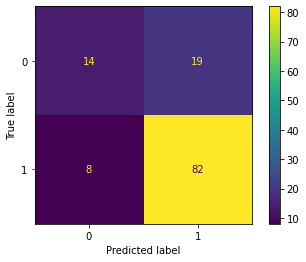

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=101)
c= model.fit(xtrain,ytrain)
b=c.predict(xtest)
a=c.predict(xtrain)
RF_A=round(accuracy_score(ytest,b),4)
print("training accuracy is : ",round(accuracy_score(ytrain,a),4)*100,"%")
print("testing accuracy",RF_A*100,"%")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(c,xtest,ytest))

#Model 4 :- Gradient Boosting Classifer

training accuracy is :  89.41 %
testing accuracy 78.86 %
Confusin Matrix for xtest data:-



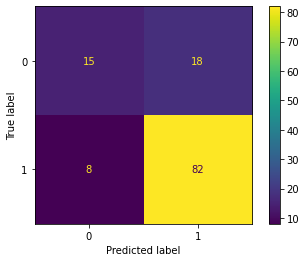

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=101)
c= model.fit(xtrain,ytrain)
b=c.predict(xtest)
a=c.predict(xtrain)
GD_A=round(accuracy_score(ytest,b),4)
print("training accuracy is : ",round(accuracy_score(ytrain,a),4)*100,"%")
print("testing accuracy",GD_A*100,"%")
print("Confusin Matrix for xtest data:-\n\n",plot_confusion_matrix(c,xtest,ytest))

#Model Comparison - Classification

In [ ]:
dictionary1 = {'Classification Model':["KNN Classifier",
                        "Decision Tree Classifier","Random Forest Classifier",
                        "Gradient Boosting Classifier"],
               'Accuracy':[KNN_A,DT_A,RF_A,GD_A]}
models_1 = pd.DataFrame(dictionary1)
models_1.sort_values(by=["Accuracy"])

,Classification Model,Accuracy
0,KNN Classifier,0.5935
1,Decision Tree Classifier,0.7154
2,Random Forest Classifier,0.7805
3,Gradient Boosting Classifier,0.7886


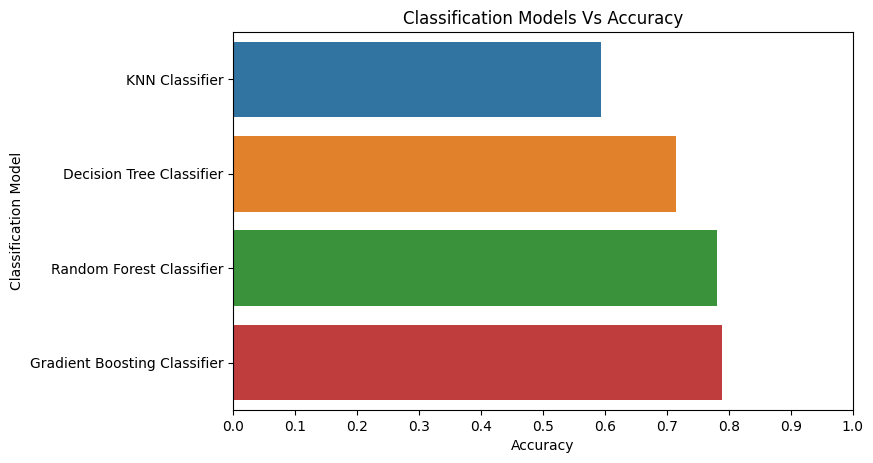

In [ ]:
plt.figure(figsize=(8,5),dpi=100)
sns.barplot(x="Accuracy",y="Classification Model",data=models_1.sort_values(by=["Accuracy"]))
plt.title("Classification Models Vs Accuracy")
plt.xticks(np.linspace(0,1,11));

**Conclusion for problem statement 1:-**


*   From above alogirithms we found out Gradient Boosting classifier is best alogirithm to find accurate predictions comparing to other model.



#Problem Statement 2 :-
 If customer is not eligible for the input required amount:
what can be amount for the given duration.

*   what can be amount for the given duration.(Regression)




In [ ]:
test = pd.read_csv("/content/machine learning project testing_set.csv")

In [ ]:
data = pd.read_csv('/content/machine learning project training_set.csv')

In [ ]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
test["TotalIncome"] = test["ApplicantIncome"] + test["CoapplicantIncome"]

In [ ]:
train = data[data.Loan_Status=="Y"]
#train contains data whose loan has been sanctioned (from main training data)

In [ ]:
test_2 = test.join(data.Loan_Status)
test = test_2[test_2.Loan_Status == 'N']
# test_df_2 contains data whose loan has been rejected
#(on testing data for which we have done predictions in problem 1)

In [ ]:
#Reindexing as we have been sorted the data based on some condition(Yes from training and No from testing using prediction)
train.index = range(0,train.shape[0])
test.index = range(0,test.shape[0])

In [ ]:
#Dropping of columns
train_2 = train.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","Loan_Status"],axis=1)
test_2 = test.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Status"],axis=1)

# Define X and Y

In [ ]:
#X and Y has been defined using training data
#P has been defined using testing data
y = train_2[["LoanAmount"]]
X = train_2.drop(["LoanAmount"],axis=1)
p = test_2

In [ ]:
#categorical and continuous column separation from X
cat1 = []
con1 = []
for i in X.columns:
    if X[i].dtypes == 'object':
        cat1.append(i)
    else:
        con1.append(i)

In [ ]:
cat1

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'property_Area']

In [ ]:
con1

['Loan_Amount_Term', 'Credit_History', 'TotalIncome']

In [ ]:
#categorical and continuous column separation from P
cat2 = []
con2 = []
for i in p.columns:
    if p[i].dtypes == "object":
        cat2.append(i)
    else:
        con2.append(i)

# One Hot Encoding:-

In [ ]:
#One hot encoding for categorical columns in X and P
X1 = pd.get_dummies(X[cat1])
P1 = pd.get_dummies(P[cat2])

In [ ]:
len(X1.columns)


15

In [ ]:
len(P1.columns)
# There is no differnce of columns in P1 compared to X1

15

# Pre-Processing

In [ ]:
# Standardisation of continous column data in X
# Standardisation of continous column data in P using same variance and standard deviation
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[con1]),columns=con1)
P2 = pd.DataFrame(ss.transform(P[con2]),columns=con2)

In [ ]:
#Joining of categorical features (after one hot encoding) with continuos features (after standardisation)
X = X1.join(X2)
p = P1.join(P2)

# Division of training data in training and testing set

In [ ]:
# now standardiszation is done on training and testing data
# now we have to use standardised training data for building model(only X and y)
# standardised testing data will be used further for predictions after building above model(P to be used)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
xtrain = xtrain.drop(['Loan_Amount_Term','Credit_History','TotalIncome'],axis='columns')

In [ ]:
xtest = xtest.drop(['Loan_Amount_Term','Credit_History','TotalIncome'],axis='columns')

In [ ]:
ytrain = ytrain.fillna(ytrain['LoanAmount'].mean())

In [ ]:
ytest = ytest.fillna(ytest['LoanAmount'].mean())

In [ ]:
print(xtrain.shape)
ytrain.shape

(337, 15)


(337, 1)

In [ ]:
ytrain.columns

Index(['LoanAmount'], dtype='object')

# Model 1 :- KNN Regression


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(xtrain,ytrain)
a=knn.predict(xtrain)
b=knn.predict(xtest)
from sklearn.metrics import mean_squared_error
print("Training error is: ",round(mean_squared_error(ytrain,a),2))
KNN_E=round(mean_squared_error(ytest,b),2)
print("Training error is: ",KNN_E)

Training error is:  5379.5
Training error is:  7623.51


# Model 2 :- DecisionTreeRegressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state=101)
dt.fit(xtrain,ytrain)
a= dt.predict(xtrain)
b= dt.predict(xtest)
from sklearn.metrics import mean_squared_error
print("Training error is: ",round(mean_squared_error(ytrain,a),2))
DT_E=round(mean_squared_error(ytest,b),2)
print("Training error is: ",DT_E)

Training error is:  3840.82
Training error is:  9556.97


### Model 3 :- Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor(random_state=101)
gb.fit(xtrain,ytrain)
a= gb.predict(xtrain)
b= gb.predict(xtest)
from sklearn.metrics import mean_squared_error
print("Training error is: ",round(mean_squared_error(ytrain,a),2))
GB_E=round(mean_squared_error(ytest,b),2)
print("Training error is: ",GB_E)

Training error is:  4397.78
Training error is:  6980.46


# Model Comparision


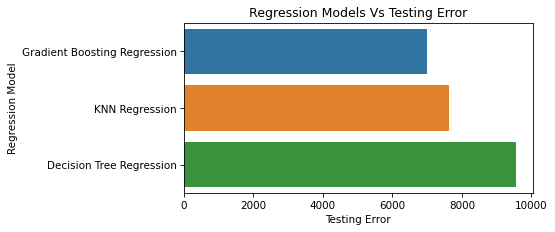

In [ ]:
dic= {'Regression Model':["KNN Regression","Decision Tree Regression",
                                  "Gradient Boosting Regression"],
             'Testing Error':[KNN_E,DT_E,GB_E]}
models = pd.DataFrame(dic)
plt.figure(figsize=(6,3),dpi=75)
sns.barplot(x="Testing Error",y="Regression Model",data=models.sort_values(by=["Testing Error"]))
plt.title("Regression Models Vs Testing Error");

# Conclusion for problem statement 2 
In above final result, LoanAmount shows actual loan amount while they applied and got rejected.